# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
# phi - the roll of the quadcopter
# theta - the pitch of the quadcopter
# psi - the yaw of the quadcopter
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

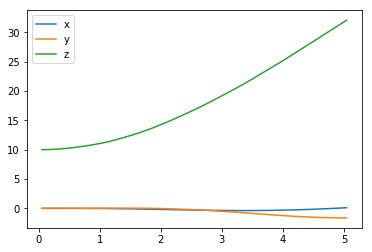

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

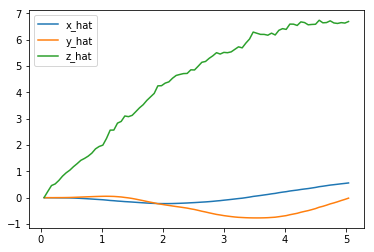

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

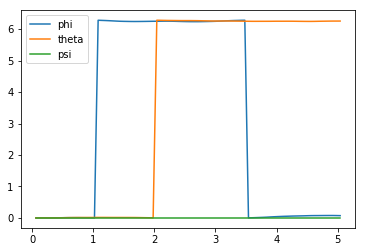

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

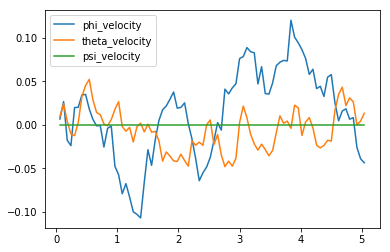

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

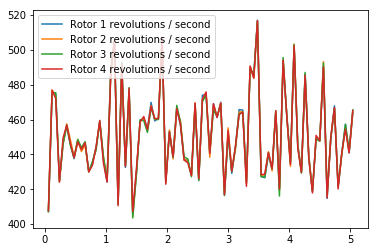

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  0.10582109  -1.63243704  32.06369008   0.07227073   6.25687221   0.        ]
[ 0.55974777 -0.01693715  6.68321303]
[-0.04368537  0.01333438  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -4.184 (best =   0.045), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import numpy as np
import sys
import pandas as pd
from task import Task
from agents.agent import Quadcopter_Agent
from collections import defaultdict, deque 

# Define hyperparameters for training the agent
alpha = 0.1 # step-size parameter
gamma = 0.80 # discount value
eps = 0.001 # set value of epsilon
num_episodes = 3000
plot_every = 50

In [2]:
# initialise the env
task = Task(init_pose=np.array([0., 0., 10., 10., 0., 0.]), \
            init_velocities=np.array([15., 15., 15.]), \
            init_angle_velocities=np.array([20., 20., 15.]), \
            target_pose=np.array([30., 30., 30., 0., 0., 0.]))

# initialise the agent
agent = Quadcopter_Agent(task)

# initialise score trackers
score_per_episode = deque(maxlen=num_episodes)
temp_score = deque(maxlen=plot_every)
total_score = deque(maxlen=num_episodes)

# initialise pose tracker
temp_pose_perf = deque(maxlen=num_episodes)
pose_perf = deque(maxlen=num_episodes)

for i_episode in range(1, num_episodes+1):
    
    # monitor progress
    if i_episode % 100 == 0:
        #print("\rEpisode {}/{} \n".format(i_episode, num_episodes), end="")
        sys.stdout.flush()

    state = agent.reset_episode()
   
    while True:
        action = agent.act(state, eps)

        # take action A, observe R, S'
        next_state, reward, done = task.step(action)
       
        # update Q and S <- S'
        state, score = agent.step(alpha, gamma, eps, action, reward, state, next_state)
        #print ("Episode {} - score = {}".format(i_episode, score))
       
        if done:
            temp_score.append(score)    # append score
            temp_pose_perf.append(state) # append current position or pose
            break

    if (i_episode % plot_every == 0):
        total_score.append(np.mean(temp_score))
        pose_perf.append(np.mean(temp_pose_perf, axis=0))

        # debug print to see if agent is learning after every episode
        #print('\t mean score = ', np.mean(total_score), ' best score = ', np.max(total_score))

Initial vel =  [ 15.  15.  15.]
Initial angle vel =  [ 20.  20.  15.]
Initial pose =  [  0.   0.  10.  10.   0.   0.]
Target pose =  [ 30.  30.  30.   0.   0.   0.]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

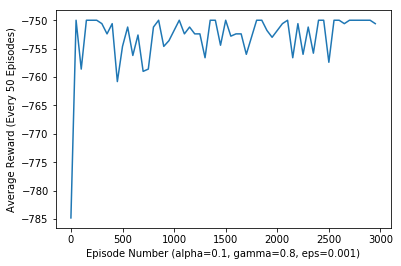

FINAL RESULT: 	 mean score =  -752.886666667  best score =  -750.0
MEAN last 10 episodes =  -757.4 Variance =  4.51333333333


In [3]:
import matplotlib.pyplot as plt

# plot performance
x_axis_label = 'Episode Number (alpha={}, gamma={}, eps={})'.format(alpha, gamma, eps)
plt.plot(np.linspace(0, num_episodes, len(total_score), endpoint=False), np.asarray(total_score))
plt.xlabel(x_axis_label)
plt.ylabel('Average Reward (Every %d Episodes)' % plot_every)

plt.show()


print('FINAL RESULT: \t mean score = ', np.mean(total_score), ' best score = ', np.max(total_score))
print('MEAN last 10 episodes = ', np.mean(total_score[-10]), 'Variance = ', np.mean(total_score)-np.mean(total_score[-10]))

## Quadcopter Trajectory Performance ##  
The following displays the X, Y an Z trajectory over the training the episodes.
With the environment initialized as such (see print statements below), the Quadcopter is near 100% to achieving its intended goal - to reach the pose of [30, 30, 30, 0, 0, 0].

----------- Environment init ------------
Initial vel =  [ 15.  15.  15.]
Initial angle vel =  [ 20.  20.  15.]
Initial pose =  [  0.   0.  10.  10.   0.   0.]
Target pose =  [ 30.  30.  30.   0.   0.   0.]
Final pose =  [ 28.37864941  29.5866781   27.67939018   1.59109923   4.15769862
   2.5561538 ]


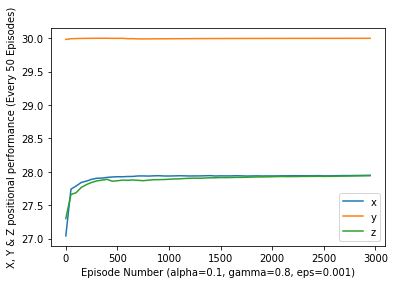

In [4]:
print ('----------- Environment init ------------')
print ('Initial vel = ', task.sim.init_velocities)
print ('Initial angle vel = ', task.sim.init_angle_velocities)
print ('Initial pose = ', task.sim.init_pose)
print ('Target pose = ', task.target_pose)
print ('Final pose = ', task.sim.pose)

# plot positional performance

x_axis_label = 'Episode Number (alpha={}, gamma={}, eps={})'.format(alpha, gamma, eps)

plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,0:1], label='x')
plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,1:2], label='y')
plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,2:3], label='z')
plt.legend()
plt.xlabel(x_axis_label)
plt.ylabel('X, Y & Z positional performance (Every %d Episodes)' % plot_every)

plt.show()

## Reflections

### **Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

### **Answer**:  

**`task.py` overview:**  
The environment is initialized with the quadcopter beginning with z-axis & rolling-angle at 10.0 so that it can lift off.
This was to provide some level of mobility in the quadcopter and the goal was to teach the agent to manoveur the quadcopter to x, y, z position of 30.0 each.

There are also 2 helper functions in `task.py` which will determine the action to be taken and returns updated Q-value for the most recent experience.


** Reward function:**  
The goal was for the agent to reach the position of [30, 30, 30] for X, Y and Z dimension.
With each timestep, the current position of the quadcopter is obtained and the difference between the current and target position was computed, for each of the X, Y and Z positions:

`pose_diff = np.around((self.sim.pose - self.target_pose), decimals=0)`

The scalar value for each positional difference is rounded to nearest whole numbers so that we apply a level of discretization to the state space as decimated differences in the positions, e.g. 15.123 --> 16.456, was harder to converge as the state space would exponentially increase.

`xyz_diff = np.around(np.square(`**`np.tanh(pose_diff [:3])`**`), decimals=1)`  

A hyperbolic tangent activation function, `tanh` was applied to each of the positional difference of X, Y & Z.
As such that if the quadcopter is near the target value (i.e. 30), `tanh` would return (near) zero for the corresponding positional difference. Where the positional difference was > 0, it signifies the quadcopter has not reached its target positional value yet.

`xyz_diff = np.around(`**`np.square(`**`np.tanh(pose_diff [:3])`**)**`, decimals=1)`  

Should quadcopter flies above the target position for any of the axes x, y or z, i.e. > 30.0, `tanh` would produce values > 0. The reverse is true when the quadcopter has **not reached** the target position, `tanh` would product values < 0. However both non-zero values should be treated as not achieving the target position and as such we apply a square function (in bold above) to turn both positive and negative non-zero values into postitive non-zero values, to pave the way for reward determination below.
Finally we apply a rounding function to keep the decimal places small.

```
for each_pos_delta in xyz_diff:
    if each_pos_delta > 0:  
        reward -= 10  
    elif each_pos_delta == 0:  
        reward += 10  
        reached_target = True
```           
Using the squared tanh output value, any non-zero value would mean the quadcopter is away from target position and hence we assign a negative reward using the squared value.
If the quadcopter reaches either x, y & z positional target, we assign a reward of 10 each time and flag that we have reached target so that we can begin a new episode.

We also penalize if the quadcopter is not lifted off properly:  
```
if self.sim.v[2] <= 0:
    reward -= 10
```  

We also reward additionally if either of X, Y and Z positions has reached its target pose values of 30.0 each.  
```
if x_pos == target_x_pos:
    reward += 10
    reached_target = True
if y_pos == target_y_pos:
    reward += 10
    reached_target = True
if z_pos == target_z_pos:
    reward += 10
    reached_target = True
```   

### **Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

### **Answer**:

**Learning algorithms:**  
I explored **Expected Sarsa** algorithm as it is known to have better online performance than off-policy TD control methods such as *Q-learning* and *Sarsa*  
At every timestep, the agent updates the Q value, based on the rotor speeds applied, observed reward, the next pose value after iterating with the task (environment).


**Choice of hyperparameters**  
The following hyperparameters were the final choices, yielding the above rewards plot:  

a) **alpha** = 0.001 # step-size parameter  
*The results did not get any better going finer than 0.001 and hence the value was chosen.*  

b) **gamma** = 0.80 # discount value  
*It was observed the value of 0.80 yielded the best learning-rewards profile for the agent. Values of 0.85 and 0.90 were also used but the agent did not manage to learn quickly enough after first 100 to 150 episodes as compared to using a value of 0.80. Values of smaller than 0.80 were also explored, e.g. 0.75 but surprising the agent also failed to learn fast enough for the first 100-150 episodes, similar to the rewards profile of using 0.85 and 0.90.  
As a result of not learning fast enough for the first 100-150 episodes, it failed to converge fast enough to stablize the rewards yield and fluctuations in the rewards profile were observed even when the episodes were nearing 3000. Hence the value of 0.80 was selected to provide the optimal results.*  

c) **eps** = 0.001 # set value of epsilon # 0.005  
*It was observed using the recommended value 0.005 yielded a satisfactory rewards profile but there were flunctuations observed at the tail end of when training winds down.  
Using an even smaller value of 0.001 yielded the best profile seen above. This might be because the agent is told to be greedy to exploit most recent, known rewards rather than being exploratory which would have fluctuated the rewards curve tremendously.*  

d) **num_episodes** = 3000  
*It was observed there were no significant improvements to the agent ability to learn after more than 3000 episodes based on the above parameters experimented and hence 3000 was chosen.*  


**Neural Network Architecture**  
*I did not use any neural nets such as DQN, Function Approximation or Actor-Critic model to do this task and instead chosen the value-based method of **Expected Sarsa**.  
This was motivated by the fact to keep the agent simple and also with the presumption that the target task to be achieved is a relatively simple, hence action-space though continuous in nature but still bounded within 'discrete steps' if we simply want to fly from a pose of [15.0, 15.0, 15.0, 0, 0, 0] to [30, 30, 30, 0, 0, 0].*  

*For the reward function, a hyperbolic tangent activation function was used so that the closer simulated and target poses are, it would yield (near) zero output for x, y, z positions which was inituitively well-suited for designing the rewards handling (as explained in the answers to Q1 above).*

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:  
Although task was not deemed difficult to learn, having given the quadcopter a head start with an initial pose of [0.0, 0.0, **10.0, 10.0**, 0, 0], in the hope it can reach the target pose of [30.0, 30.0, 30.0, 0, 0, 0], over a small (though continuous) state spaces, the tweaking of hyperparameters took very long to experiment to reach the current 'best' rewards profile.
The current rewards profile was not achievable if we had started the quadcopter at [0, 0, 0, 0, 0, 0]. It was while ploughing through the forums that I realized I should give the quadcopter a head start by setting the z-axis value to some initial value rather than 0.  
It was also observed, using all zeros for initial velocity and initial angle velocity yielded very bad results and the Quadcopter was either not taking off or landed (crashing!) very quickly after takeoff.
Trying it with various values, I landed at using initial velocity of 15.0 for each value and 20.0 for both θ (pitch) and ϕ (roll) and 15.0 for ψ (yaw).
I cannot explain why this was so but probably how the phyiscs simulation was setup.

There was alot of tweaking with different combo of hyperparameters and environment initialization values.  
The aha moment was by initializing values for z-axis and θ (pitch) (both at 10.0) and stabilizng the gamma value at 0.80 for the initialized environment conditions, causing it to learn quickly to accelerate towards the intended pose quite quickly in the first 100-150 episodes.

The agent seems to done on its learning as soon as it reaches a pose after around 100 episodes and the mean rewards for the last 10 episodes was close to the overall reward mean for entire training session, with a small variance of -1.273.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?


**Answer**:  
The hardest part was to pick the appropriate algorithm to tackle the task at hand.
For such a task, where the state & action spaces are both continuous, it was not easy to understand how to rationalize the environment, as opposed to what has been learnt from the lectures, where the state and action spaces were more discrete and action space especially was distinct (LEFT, RIGHT, UP & DOWN).
The TD algorithms had the most lasting impression on me and I picked it to tackle this task.
After alot of tweaking and struggling to make the agent learn, I turned to applying some level of discretization to the state spaces (using whole numbers for the values and forming unique tuple keys for the Q dictionary structure), to make the agent infer the right rewards from the actions while still complete the learning within reasonable number of training episodes.

Designing the reward function also took alot of time to settle on using tanh activation function to infer a probalistic weightage to the difference in simulated and target poses values.
A straightforward inference of differences to assign a reward value without any activation function, failed to make the agent learn at all.

IMHO, it was a not an excellent fit to use TD algorithm although it did a reasonable job of learning in the end. 
A neural based RL algorithm, such Actor-Critic might have been a better choice. But alas, i ran out of time to pivot my implementation but I would certainly explore it in my own time after the project submission.

I was quite thrilled to see the agent being able to learn in its initial episodes of training and was threading towards a target pose.